# Tensorflow 2.0 for (2xs-3zs+5+noise)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Data 

In [2]:
observations = 1000

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-1,1,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('tf_intro',inputs=generated_inputs,targets=generated_targets)


# Model & Training

In [3]:
training_data = np.load('tf_intro.npz')

In [14]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                              tf.keras.layers.Dense(output_size)
                              ])
model.compile(optimizer='sgd',loss='huber_loss')

model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2337
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2010
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8592
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5456
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2310
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 2.9274
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 2.6354
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 2.3615
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.1108
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.8882
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 1.6851
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5044
Epoch 13/100
32/32 [=================

# Extract the weights and bias

In [8]:
model.layers[0].get_weights()


[array([[ 2.0064461],
        [-2.997937 ]], dtype=float32),
 array([5.0021663], dtype=float32)]

In [9]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0064461],
       [-2.997937 ]], dtype=float32)

In [16]:
bias = model.layers[0].get_weights()[1]
bias

array([5.004813], dtype=float32)

# Extract the outputs(make predictions)

In [17]:
model.predict_on_batch(training_data['inputs'])

array([[ 21.647797  ],
       [ -1.4072375 ],
       [  1.1923761 ],
       [ 10.960223  ],
       [  1.696856  ],
       [ 12.245731  ],
       [ -0.76667356],
       [ -6.297226  ],
       [ -3.9395752 ],
       [ -8.240118  ],
       [ -4.6277657 ],
       [ 16.890528  ],
       [ 21.962261  ],
       [ -1.1197023 ],
       [ -9.807681  ],
       [  0.75023174],
       [  1.1156712 ],
       [ -6.5354986 ],
       [ 17.098663  ],
       [ -0.650774  ],
       [  7.4845486 ],
       [ 24.090702  ],
       [ 20.879166  ],
       [  6.673341  ],
       [-11.668763  ],
       [-13.826217  ],
       [ 14.467049  ],
       [-17.13002   ],
       [ 16.327965  ],
       [-15.951732  ],
       [ 10.809739  ],
       [-12.92232   ],
       [ 12.397781  ],
       [ 10.123626  ],
       [  5.369197  ],
       [ 17.852468  ],
       [ 18.157068  ],
       [ 14.662206  ],
       [ 13.412295  ],
       [ 23.914482  ],
       [  8.385747  ],
       [  7.6130857 ],
       [ 15.431884  ],
       [ -4

# Plotting the data

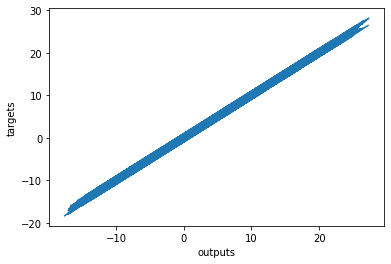

In [18]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()